# Linear Regression - Univarient

In [1]:
import os
import pandas as pd
nb_full_path = os.path.join(os.getcwd(), 'Day-9.ipynb')
df=pd.read_csv(os.path.join(os.path.dirname(nb_full_path) + '/data/weight-height.csv'), sep=',',header=0)
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2]:
df[['Height', 'Weight']].describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [16]:
print(df.cov())

            Height       Weight
Height   14.803473   114.242656
Weight  114.242656  1030.951855


Mean: Average value of the pupulation
Variance:
- Finding the mean(the average).
- Subtracting the mean from each number in the data set and then squaring the result. 
- The results are squared to make the negatives positive. Otherwise negative numbers would cancel out the positives in the next step. It’s the distance from the mean that’s important, not positive or negative numbers.
- Averaging the squared differences.

Std: The square root of the variance is the standard deviation. While var. gives you a rough idea of spread, the standard deviation is more concrete, giving you exact distances from the mean.

Percentile: A percentile is the value at a particular rank. ... For example, if your score on a test is on the 95th percentile, a common interpretation is that only 5% of the scores were higher than yours. The median is the 50th percentile; it is commonly assumed that 50% the values in a data set are above the median.

25%: Value at 25 percetile

50%: Value at 50 percetile

75%: Value at 75 percetile

Min: Minimum value of the population

Max: Maximum value of the population

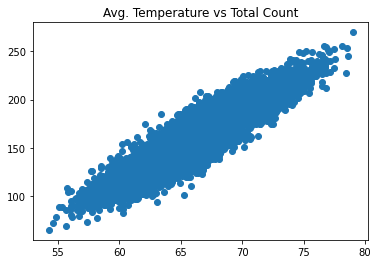

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['Height'], df['Weight'])
plt.title("Avg. Temperature vs Total Count")
plt.show()

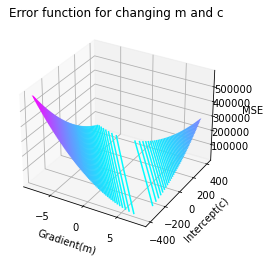

In [28]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import time
import os
nb_full_path = os.path.join(os.getcwd(), 'Day-9-Height-Weight.ipynb')
df=pd.read_csv(os.path.join(os.path.dirname(nb_full_path) + '/data/weight-height.csv'), sep=',',header=0)
X = df['Height'].values
Y = df['Weight'].values
range_m = np.linspace(-8,8,100)
range_c = np.linspace(-400,400,100)

def error(m, c):
    y_predict = m * X + c
    error = Y - y_predict
    error_sq = error ** 2
    error_sum = error_sq.sum()
    error_avg = error_sq.sum()/(2*len(error_sq))
    return error_avg


M, C = np.meshgrid(range_m, range_c)

Z = []
for c in range_c:
    t = []
    for m in range_m:
        t.append(error(m,c))
    Z.append(t)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel("Gradient(m)")
ax.set_ylabel("Intercept(c)")
ax.set_zlabel("MSE")
ax.contour3D(M, C, Z, 100, cmap=cm.cool)
plt.title(f"Error function for changing m and c")
plt.show()

# Single variant linear regression

In [21]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test = train_test_split(df[['Height']],Y, test_size = 20, random_state = 0)
reg = LinearRegression().fit(X_train,y_train)
print("R-Squared value:", reg.score(X_test, y_test))
print("Estimated slope:", reg.coef_)
print("Estimated intercept", reg.intercept_)

R-Squared value: 0.8949536323984842
Estimated slope: [7.71606091]
Estimated intercept -350.6609007591157


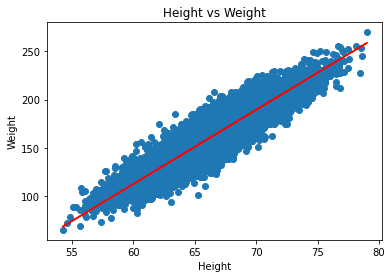

In [27]:
import matplotlib.pyplot as plt
y_fit = 7.71606091*df['Height']-350.6609007591157
ax = plt.plot(df['Height'], y_fit, color = 'r')
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("Height vs Weight")
plt.show()